In [ ]:
!pip install yfinance==0.1.67

In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [158]:
tesla = yf.Ticker("TSLA")

In [159]:
tesla_data = tesla.history(period="max")

In [160]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


In [161]:
gme = yf.Ticker("GME")

In [162]:
gme_data = gme.history(period="max")

In [163]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [164]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

data  = requests.get(url).text

In [165]:
soup = BeautifulSoup(data, 'html')
soup.find_all('title')

[<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>]

In [166]:
tesla_revenue = pd.DataFrame(columns=["Date","Revenue"])

for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    Date = col[0].text
    Revenue = col[1].text.replace("$", "").replace(",", "")

    tesla_revenue = tesla_revenue.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)    

In [167]:
tesla_revenue.dropna(inplace=True)
tesla_revenue.tail()

,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


In [168]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

data  = requests.get(url).text

In [169]:
soup = BeautifulSoup(data, 'html')
soup.find_all('title')

[<title>GameStop Revenue 2010-2022 | GME | MacroTrends</title>]

In [175]:
gme_revenue = pd.DataFrame(columns=["Date","Revenue"])

for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    Date = col[0].text
    Revenue = col[1].text.replace("$", "").replace(",", "")

    gme_revenue = gme_revenue.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)   

In [176]:
gme_data.dropna(inplace=True)
gme_data.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
5232,2022-11-23,25.920000,27.139999,25.920000,26.700001,2737500,0.0,0.0
5233,2022-11-25,26.500000,27.049999,26.139999,26.170000,1122700,0.0,0.0
5234,2022-11-28,25.790001,26.440001,25.209999,25.290001,2440900,0.0,0.0
5235,2022-11-29,25.580000,26.350000,25.320000,25.600000,2029500,0.0,0.0
5236,2022-11-30,25.900000,26.230000,24.910000,26.209999,3640990,0.0,0.0


In [177]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

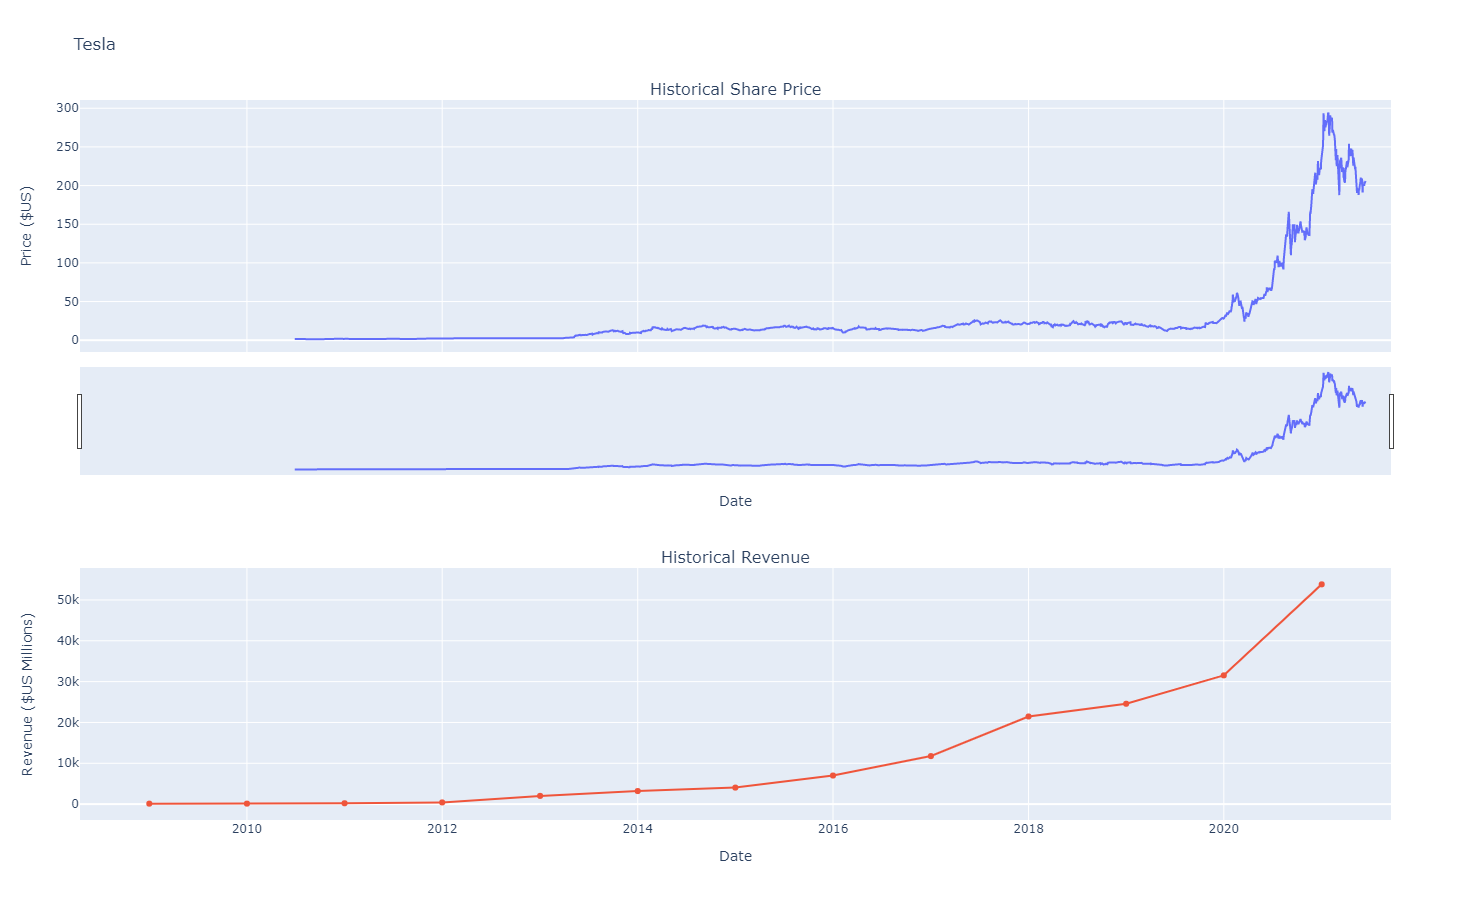

In [173]:
make_graph(tesla_data,tesla_revenue,'Tesla')

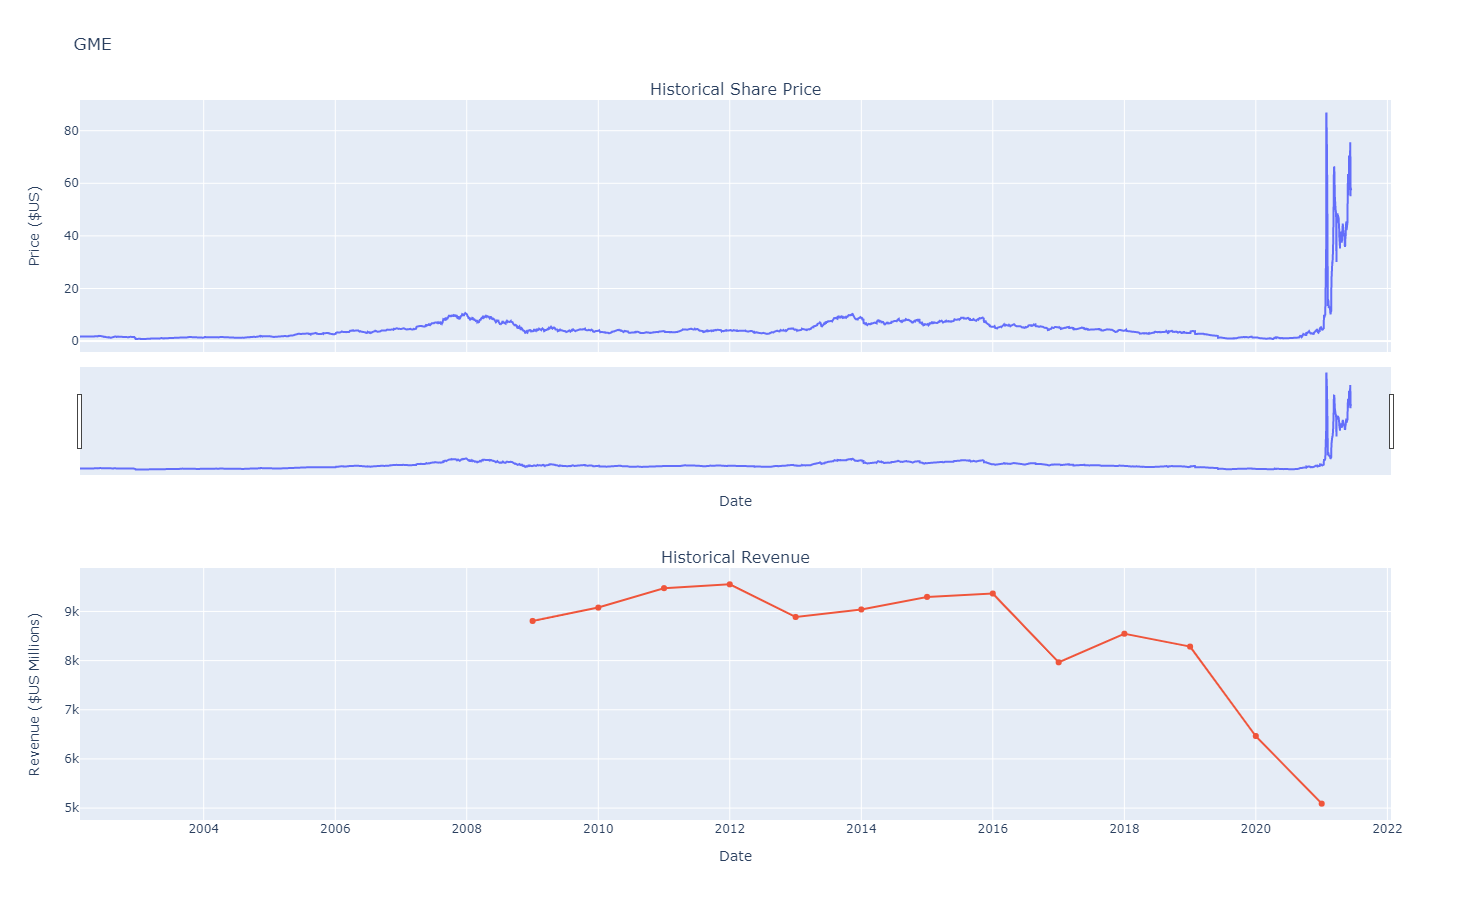

In [179]:
make_graph(gme_data,gme_revenue,'GME')